In [39]:
from sklearn.datasets  import load_digits
data=load_digits()
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

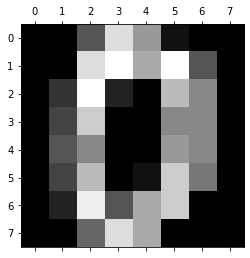

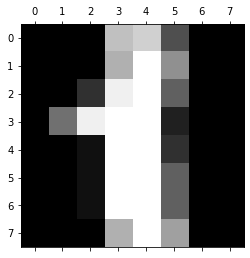

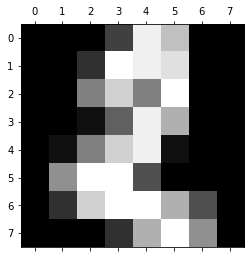

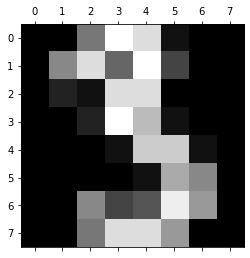

In [41]:
plt.gray() 
for i in range(4):
    plt.matshow(data.images[i]) 

In [42]:
import pandas as pd
df=pd.DataFrame(data.data)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [43]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [44]:
df['target']=data.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [45]:
from sklearn.model_selection import train_test_split
xtrean,xtest,ytrean,ytest=train_test_split(df.drop(['target'],axis=1),df.target,train_size=.8)

In [46]:
len(xtrean)

1437

In [47]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=40)


In [48]:
model.fit(xtrean,ytrean)

RandomForestClassifier(n_estimators=40)

In [49]:
model.score(xtest,ytest)

0.9666666666666667

In [52]:
y_predicted = model.predict(xtest)

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 35,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  1,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  0, 33]], dtype=int64)

<AxesSubplot:>

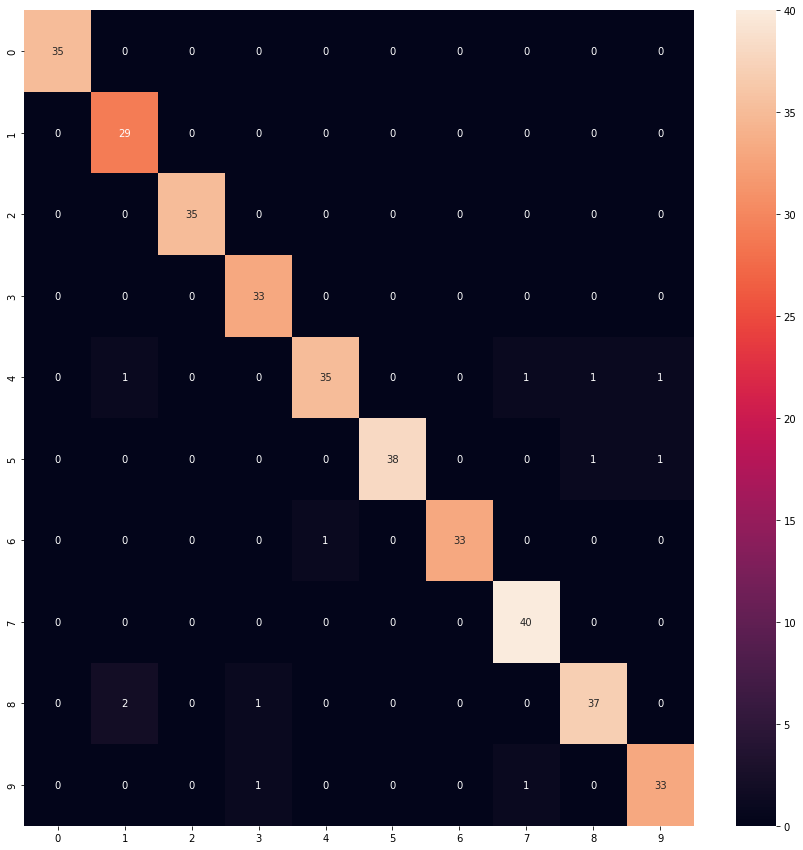

In [55]:
import seaborn as sb
plt.figure(figsize=(15,15))
plt.xlabel('Predicted')
plt.ylabel('Truth')
sb.heatmap(cm,annot=True)
